In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from tabulate import tabulate
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

---
# Часть 1. Подготовка данных


In [2]:
#загрузка данных
df_original = pd.read_csv('data.csv', delimiter=';')

In [3]:
#наименования столбцов таблицы
cols = df_original.columns
for i in range(len(cols)):
  print(cols[i])

Номер варианта
ID
INCOME_BASE_TYPE
CREDIT_PURPOSE
INSURANCE_FLAG
DTI
SEX
FULL_AGE_CHILD_NUMBER
DEPENDANT_NUMBER
EDUCATION
EMPL_TYPE
EMPL_SIZE
BANKACCOUNT_FLAG
Period_at_work
age
EMPL_PROPERTY
EMPL_FORM
FAMILY_STATUS
max90days
max60days
max30days
max21days
max14days
avg_num_delay
if_zalog
num_AccountActive180
num_AccountActive90
num_AccountActive60
Active_to_All_prc
numAccountActiveAll
numAccountClosed
sum_of_paym_months
all_credits
Active_not_cc
own_closed
min_MnthAfterLoan
max_MnthAfterLoan
dlq_exist
thirty_in_a_year
sixty_in_a_year
ninety_in_a_year
thirty_vintage
sixty_vintage
ninety_vintage


In [10]:
# Описание столбцов
table_description = pd.read_csv('description.csv', delimiter=';', encoding='windows-1251')

display(table_description)

,Атрибуты,Описание,Description
0,Номер варианта,Номер варианта,Variant number
1,ID,Идентификатор клиента,Client ID
2,INCOME_BASE_TYPE,Подтверждение дохода,Income verification
3,CREDIT_PURPOSE,Цель получения кредита,Purpose of the loan
4,INSURANCE_FLAG,Страхование заемщика при получении кредита,Borrower's insurance when receiving a loan
5,DTI,debt-to-income ratio — отношение долга к доходам,debt-to-income ratio - the ratio of debt to in...
6,SEX,Пол,Floor
7,FULL_AGE_CHILD_NUMBER,Кол-во лет ребенку,Number of years of the child
8,DEPENDANT_NUMBER,Кол-во иждивенцев,Number of dependents
9,EDUCATION,Образование,Education


Всего 44 столбца: 19 категориальных (INCOME_BASE_TYPE, CREDIT_PURPOSE, INSURANCE_FLAG, SEX, EDUCATION, EMPL_TYPE, EMPL_SIZE, BANKACCOUNT_FLAG, EMPL_PROPERTY, EMPL_FORM, FAMILY_STATUS, if_zalog, dlq_exist, thirty_in_a_year, sixty_in_a_year, ninety_in_a_year, thirty_vintage, sixty_vintage, ninety_vintage); 25 количественных переменных

## 1. Исследование распределения по данным

In [11]:
# Создание рабочей копии для анализа
df = df_original

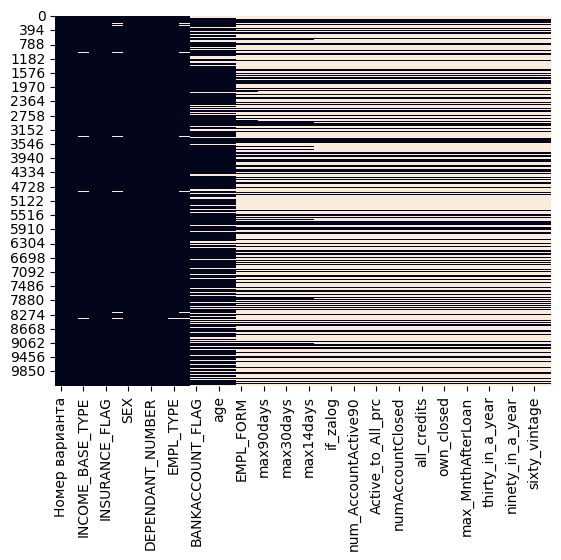

In [12]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

Исходя из диаграммы выше, в датафрейме много пустых значений, в том числе и в столбцах с количественными переменными.

In [13]:
# Расчет кол-ва уникальных значений, нулевых и пустых значений + доля в % от общего кол-ва

def columnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.dtypes]
    return row

def df_statistics(df):
    data = []
    for column in df:
        data.append([column] + columnValues(df[column]))

    print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs', 'data type'], tablefmt='orgtbl'))


df_statistics(df)

| Column                |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|-----------------------+----------------+---------------+--------------+-------------+-------------|
| Номер варианта        |              1 |             0 |            0 |         0   | int64       |
| ID                    |          10243 |             0 |            0 |         0   | int64       |
| INCOME_BASE_TYPE      |              4 |             0 |           80 |         0.8 | object      |
| CREDIT_PURPOSE        |             10 |             0 |            0 |         0   | object      |
| INSURANCE_FLAG        |              2 |          3980 |            0 |         0   | int64       |
| DTI                   |             60 |             0 |          143 |         1.4 | float64     |
| SEX                   |              2 |             0 |            0 |         0   | object      |
| FULL_AGE_CHILD_NUMBER |              7 |          6089 |            0 |         

Сделаем вывод по категориальным переменным:

INCOME_BASE_TYPE – 4 уникальных значения, есть 80 пропусков (при анализе таблицы в Excel для всех строк с пропусками EMPL_SIZE также пуст)

CREDIT_PURPOSE – 10 уникальных значений, пропусков нет

INSURANCE_FLAG – логическая переменная (1 – да, 0 – нет), пропусков нет

SEX – 2 уникальных значения, пустых строк нет

EDUCATION – 9 уникальных значений, пустых строк нет

EMPL_TYPE – 9 уникальных значений, 14 пустых строк – 14 пропусков (в этих строках часто отсутствуют значения INCOME_BASE_TYPE и EMPL_SIZE)

EMPL_SIZE – 8 уникальных значений, 142 пустых строки (либо удаляем их, либо указываем n a)

BANKACCOUNT_FLAG – 5 уникальных значений, 2304 пустых значений

EMPL_PROPERTY – 12 уникальных значений, 2304 пустых значений (совпадают с BANKACCOUNT_FLAG)

EMPL_FORM – 6 уникальных значений, 6360 пустых значений

FAMILY_STATUS – 6 уникальных значений, 6360 пустых значений

if_zalog – 2 уникальных значения, 6663 пустых значений

dlq_exist – 2 уникальных значения, 6663 пустых значений

thirty_in_a_year – 2 уникальных значения, 6663 пустых значений

sixty_in_a_year – 2 уникальных значения, 6663 пустых значений

ninety_in_a_year – 2 уникальных значения, 6663 пустых значений

thirty_vintage – 2 уникальных значения, 6663 пустых значений

sixty_vintage – 2 уникальных значения, 6663 пустых значений

ninety_vintage – 2 уникальных значения, 6663 пустых значений

Удалим столбец "Номер варианта" - не относится к анализируемым данным

In [14]:
#удаление столбца 'Номер варианта' и 'ID'
df = df.drop(columns=['Номер варианта'])

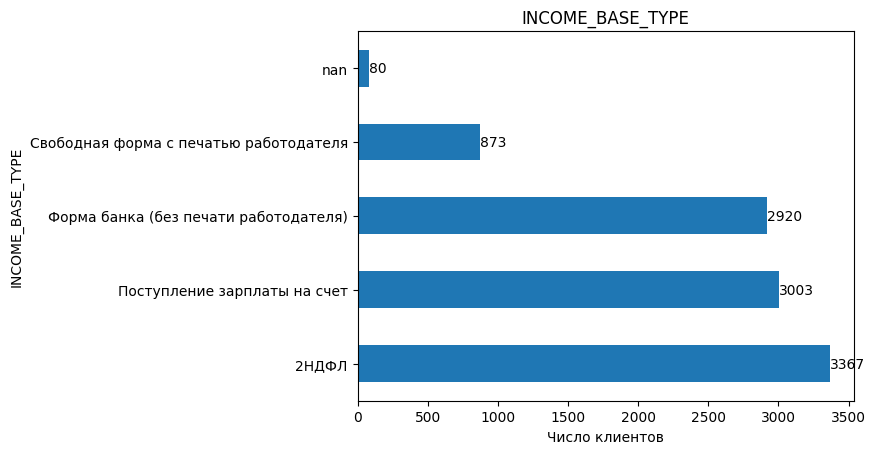

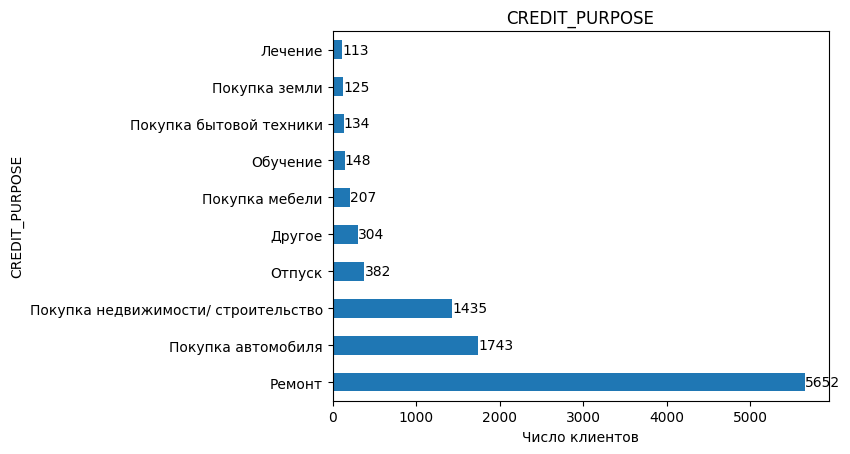

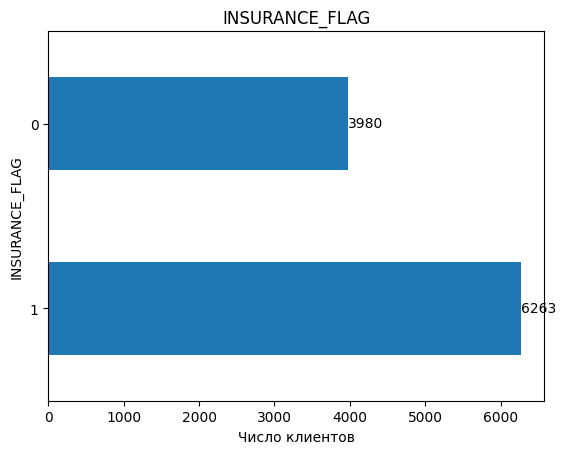

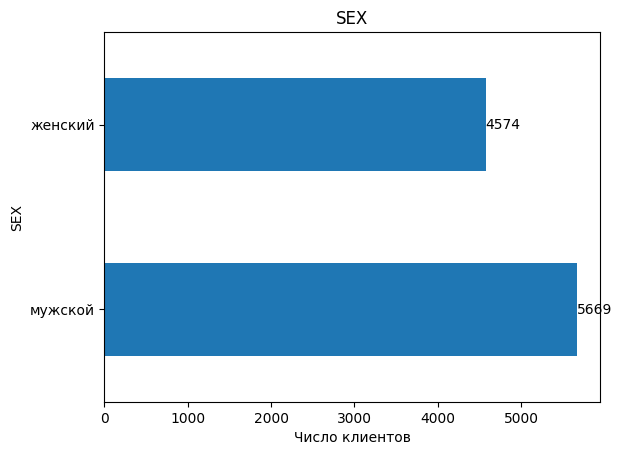

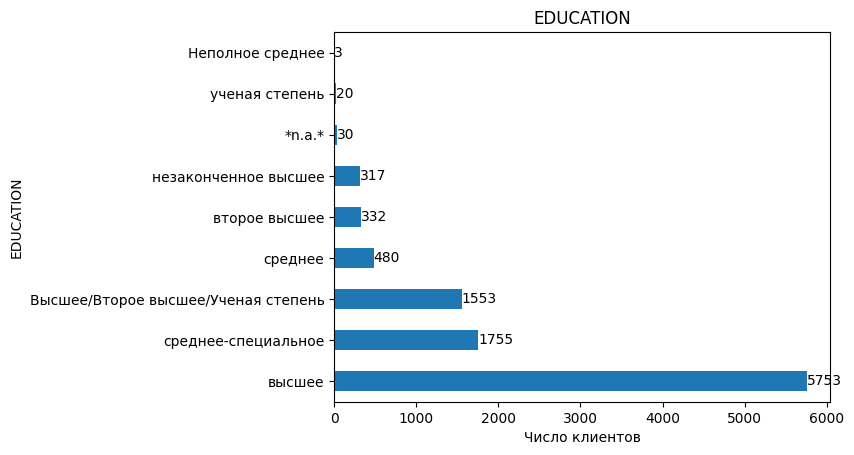

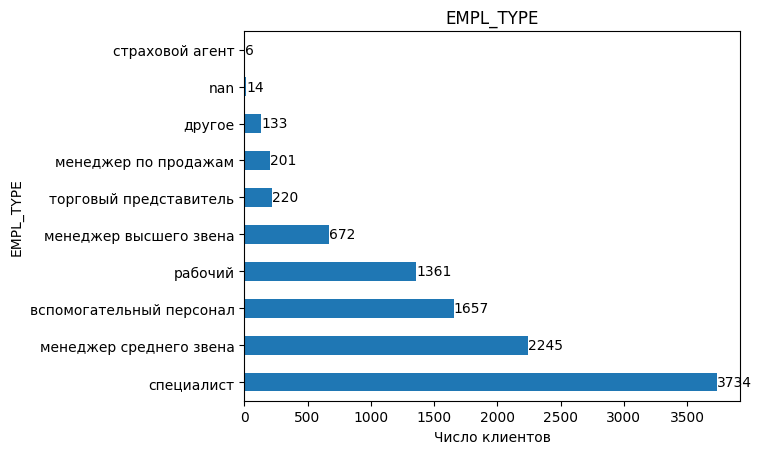

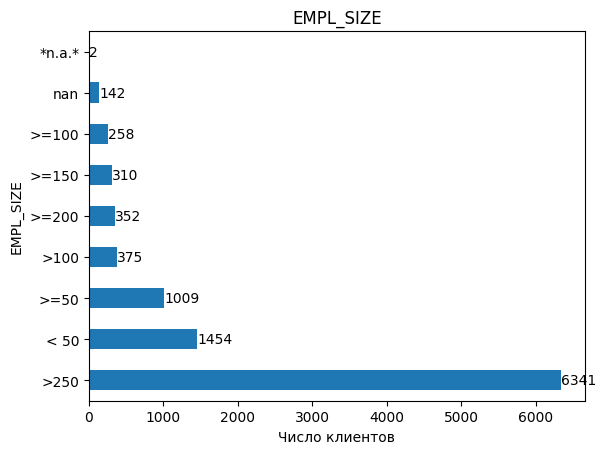

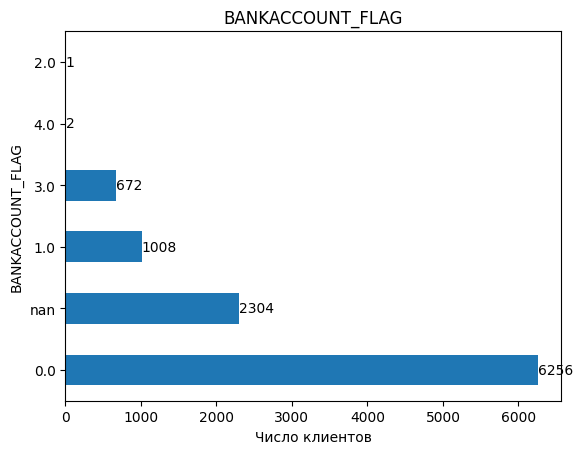

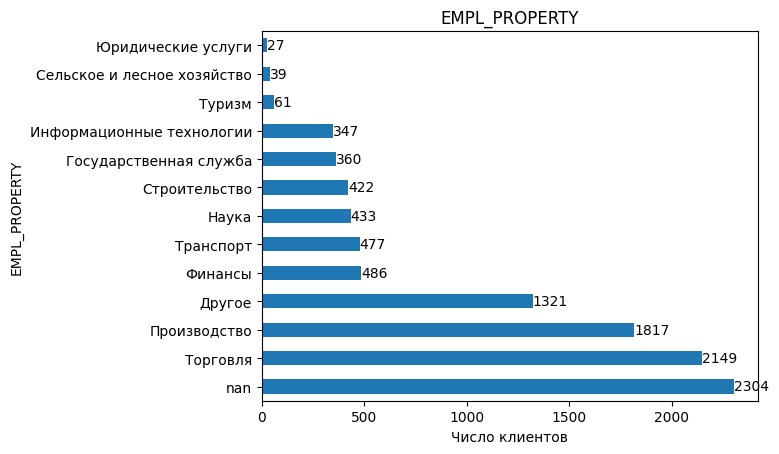

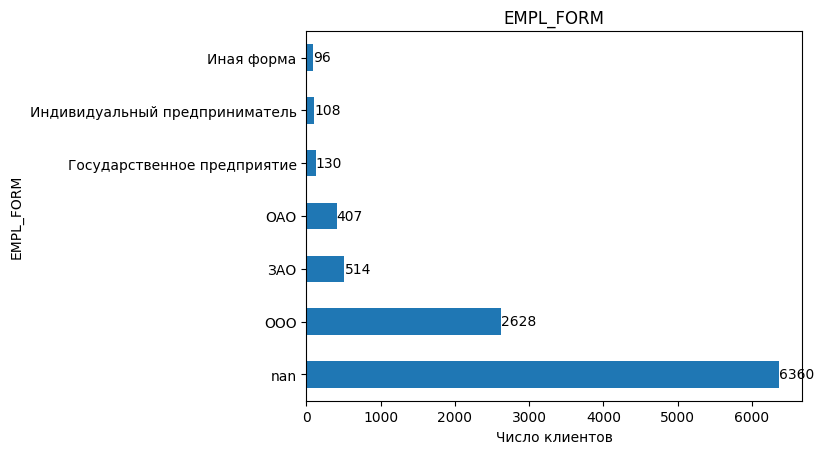

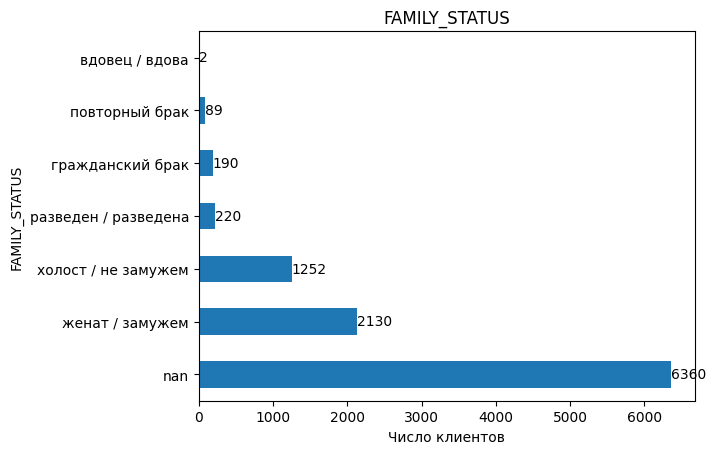

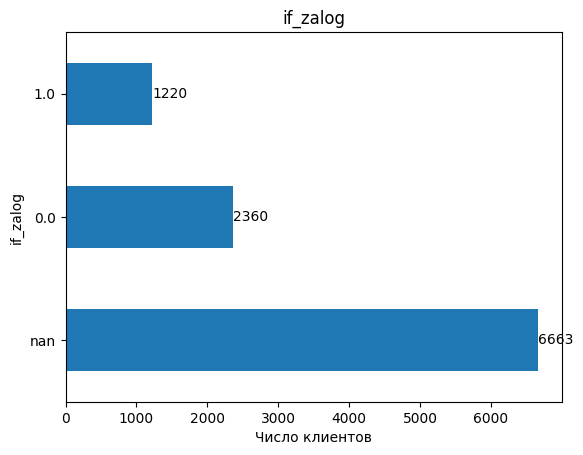

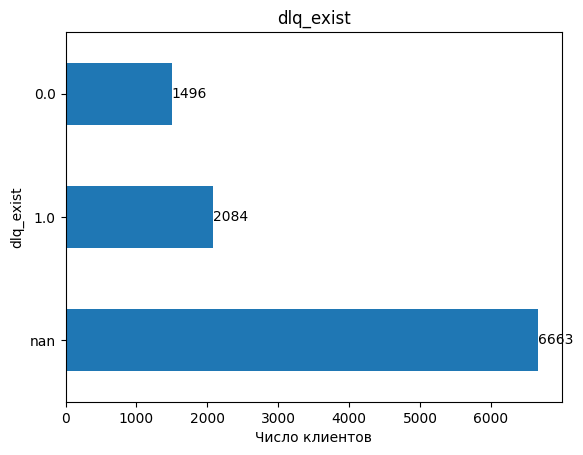

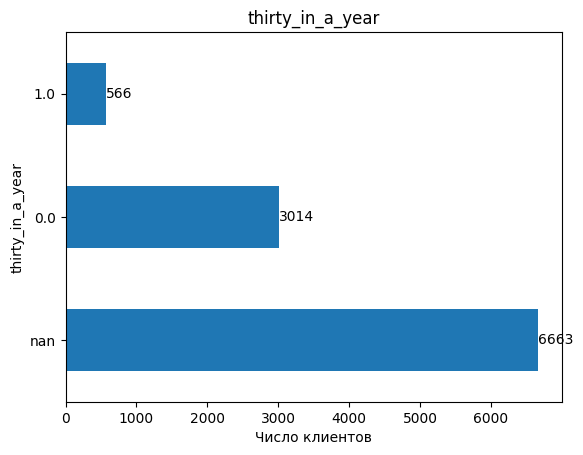

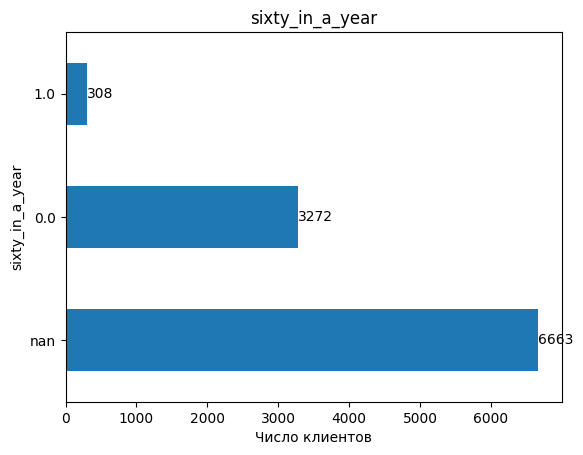

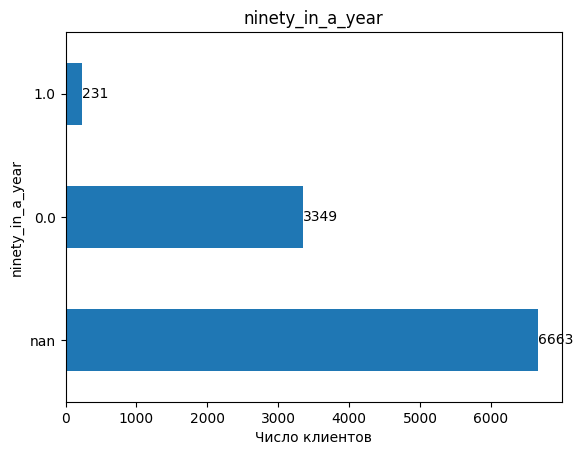

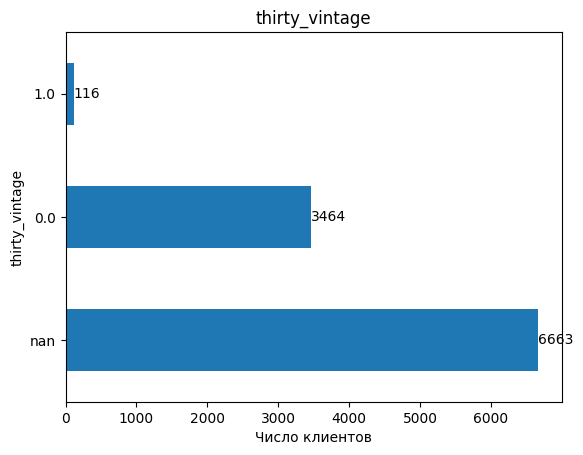

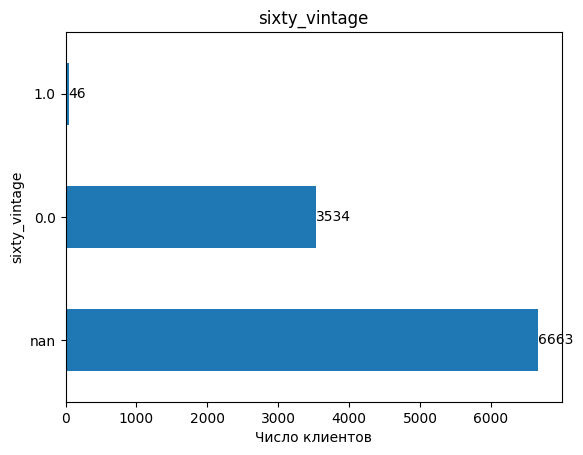

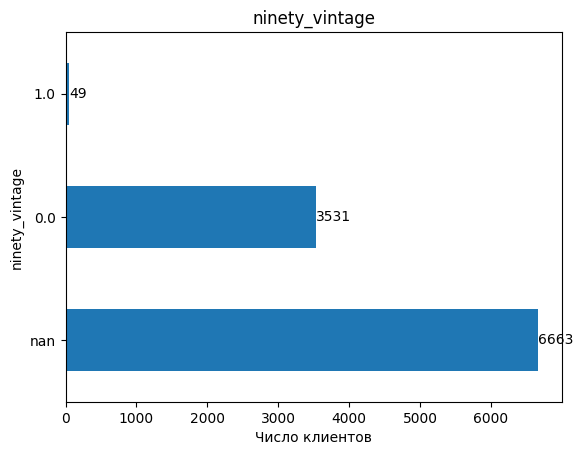

In [15]:
# графики распределения уникальных значений каждой категориальной переменной, учитывая возможные пустые значения
def plot_variable(dfp):
  count = df[dfp].value_counts(dropna=False)

  ax = count.plot(kind='barh')
  plt.title(dfp)
  plt.xlabel('Число клиентов')
  ax.bar_label(ax.containers[0], label_type='edge')
  plt.show()

categorical_variables = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'BANKACCOUNT_FLAG', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog','dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year' ,'ninety_in_a_year','thirty_vintage', 'sixty_vintage', 'ninety_vintage']


for i in categorical_variables:
  plot_variable(i)

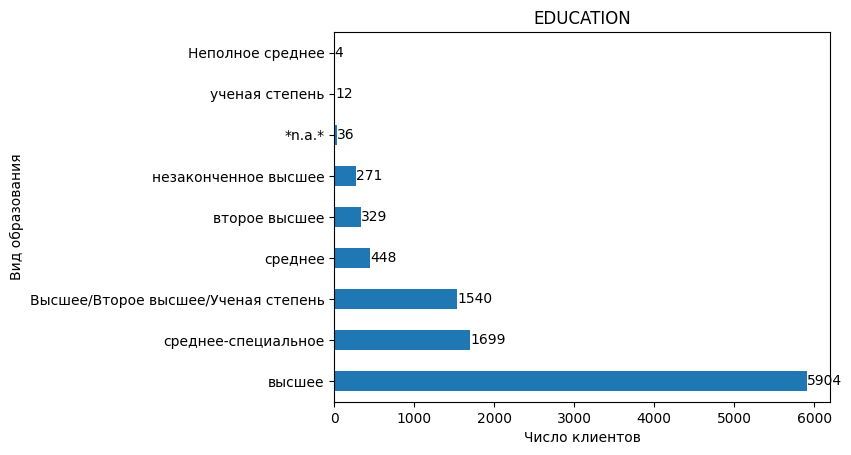

In [ ]:
# Посмотрим значения категориальной переменной EDUCATION
education_categories = df['EDUCATION'].value_counts(dropna=False)

ax = education_categories.plot(kind='barh')
plt.title('EDUCATION')
plt.xlabel('Число клиентов')
plt.ylabel('Вид образования')
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

In [16]:
# Сделаем преобразования нескольких значений в столбце EDUCATION (объединим разные значения для высшего и среднего образования)
df['EDUCATION'] = df['EDUCATION'].replace(['Высшее/Второе высшее/Ученая степень', 'высшее', 'второе высшее'],'Высшее')
df['EDUCATION'] = df['EDUCATION'].replace(['среднее', 'среднее-специальное'],'Среднее')

df['EDUCATION'].unique()

array(['Среднее', 'Высшее', 'незаконченное высшее', '*n.a.*',
       'ученая степень', 'Неполное среднее'], dtype=object)

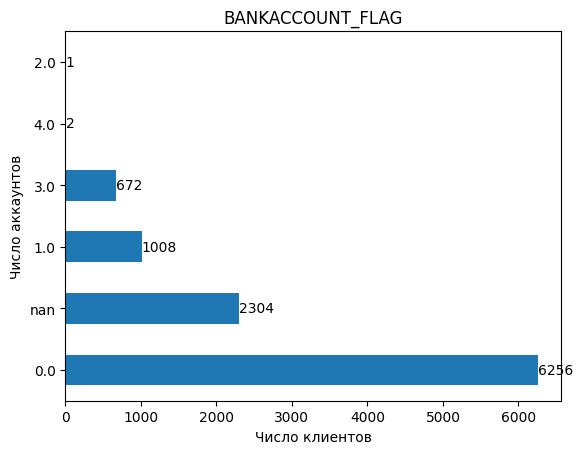

In [17]:
# Посмотрим значения категориальной переменной BANKACCOUNT_FLAG
education_categories = df['BANKACCOUNT_FLAG'].value_counts(dropna=False)

ax = education_categories.plot(kind='barh')
plt.title('BANKACCOUNT_FLAG')
plt.xlabel('Число клиентов')
plt.ylabel('Число аккаунтов')
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

In [18]:
# Сделаем преобразования нескольких значений в столбце BANKACCOUNT_FLAG
# 3,4 - значения, которые говорят, что клиент заходил 2 и более раз, значит, для упрощения можно объединить эти уникальные значения в одно

df['BANKACCOUNT_FLAG'] = df['BANKACCOUNT_FLAG'].replace([3.,4.],2.)
df['BANKACCOUNT_FLAG'].unique()

array([ 0.,  2.,  1., nan])

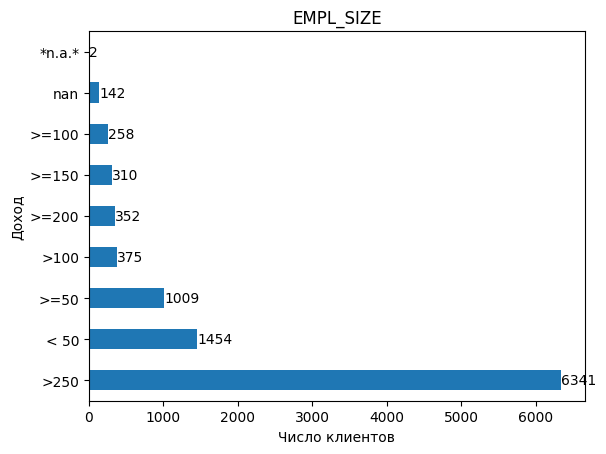

In [19]:
# Посмотрим значения категориальной переменной EMPL_SIZE
education_categories = df['EMPL_SIZE'].value_counts(dropna=False)

ax = education_categories.plot(kind='barh')
plt.title('EMPL_SIZE')
plt.xlabel('Число клиентов')
plt.ylabel('Доход')
ax.bar_label(ax.containers[0], label_type='edge')

plt.show()

In [20]:
# Сделаем преобразования нескольких значений в столбце EMPL_SIZE
# объединим 2 похожих уникальных значения
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace({'>100': '>=100'})
# в выборке есть строки с *n.a.*, а есть пустые (134 строки), что означает одно и то же, доход не указан
df['EMPL_SIZE'] = df['EMPL_SIZE'].replace({np.nan: '*n.a.*'})
df['EMPL_SIZE'].unique()

array(['< 50', '>250', '*n.a.*', '>=50', '>=100', '>=150', '>=200'],
      dtype=object)

Количество строк с незаполненными столбцами if_zalog, dlq_exist, thirty_in_a_year, sixty_in_a_year, ninety_in_a_year, sixty_vintage, ninety_vintage составляет 6663 (значительная часть данных), причем для всех пустых значений это одни и те же строки.
Это категориальные переменные, и восстановление их значений для пропусков может привести к ошибкам в дальнейшей сегментации, поэтому такие строки необходимо удалить из таблицы.

In [21]:
# удаляем пустые строки if_zalog, dlq_exist, thirty_in_a_year, sixty_in_a_year, ninety_in_a_year, sixty_vintage, ninety_vintage
df = df.dropna(subset=['if_zalog'])

После удаления значительной части таблицы оценим количество строк с "*n.a.*" в качественных переменных

In [22]:
df['EMPL_SIZE'].value_counts() # 2 значения *n.a.* - таких значений мало в сравнении со всем фреймом, можно удалить такие строки
df['EDUCATION'].value_counts() # 13 значений *n.a.* - таких значений мало в сравнении со всем фреймом, можно удалить такие строки

df = df.loc[~df['EDUCATION'].isin(['*n.a.*'])]
df = df.loc[~df['EMPL_SIZE'].isin(['*n.a.*'])]

df.shape

(3567, 43)

In [23]:
# Посмотрим предварительные итоги
df_statistics(df)

| Column                |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|-----------------------+----------------+---------------+--------------+-------------+-------------|
| ID                    |           3567 |             0 |            0 |         0   | int64       |
| INCOME_BASE_TYPE      |              4 |             0 |            0 |         0   | object      |
| CREDIT_PURPOSE        |             10 |             0 |            0 |         0   | object      |
| INSURANCE_FLAG        |              2 |          1381 |            0 |         0   | int64       |
| DTI                   |             57 |             0 |            0 |         0   | float64     |
| SEX                   |              2 |             0 |            0 |         0   | object      |
| FULL_AGE_CHILD_NUMBER |              5 |          2185 |            0 |         0   | int64       |
| DEPENDANT_NUMBER      |              3 |          3547 |            0 |         

После выполненных изменений пустых значений в категориальных столбцах не осталось, перейдем к анализу количественных

In [24]:
# Построение кореляционной матрицы для количественных переменных
categorical_variables = ['ID','INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'INSURANCE_FLAG', 'SEX', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE', 'BANKACCOUNT_FLAG', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS', 'if_zalog','dlq_exist', 'thirty_in_a_year', 'sixty_in_a_year' ,'ninety_in_a_year','thirty_vintage', 'sixty_vintage', 'ninety_vintage']
df_copy = df.drop(columns=categorical_variables)

correlation_matrix = df_copy.corr().abs()

display(correlation_matrix.style.highlight_between(left=0.7, right=1, inclusive='left', color='springgreen'))

,DTI,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan
DTI,1.000000,0.061352,0.028152,0.035511,0.042311,0.118619,0.089908,0.074734,0.044603,0.043178,0.046580,0.169945,0.080981,0.053389,0.157913,0.316518,0.113969,0.172434,0.218998,0.283431,0.082462,0.196895,0.036089
FULL_AGE_CHILD_NUMBER,0.061352,1.000000,0.012226,0.017076,0.031734,0.007942,0.004113,0.011490,0.018385,0.010275,0.007866,0.019325,0.024488,0.024081,0.071732,0.024539,0.061631,0.074617,0.058731,0.031269,0.065708,0.042161,0.140483
DEPENDANT_NUMBER,0.028152,0.012226,1.000000,0.021074,0.007423,0.019229,0.015397,0.023201,0.004693,0.013784,0.016497,0.002340,0.002187,0.003167,0.017737,0.041441,0.010865,0.008262,0.025479,0.054087,0.019586,0.010683,0.019495
Period_at_work,0.035511,0.017076,0.021074,1.000000,0.372745,0.041457,0.037669,0.031642,0.032987,0.036303,0.095552,0.030326,0.028286,0.033457,0.078522,0.062814,0.120581,0.178819,0.120642,0.083613,0.136585,0.038276,0.212309
age,0.042311,0.031734,0.007423,0.372745,1.000000,0.037435,0.024713,0.025844,0.012983,0.013576,0.076064,0.013368,0.019202,0.030646,0.099008,0.085926,0.110816,0.231335,0.122416,0.080677,0.093535,0.098059,0.330677
max90days,0.118619,0.007942,0.019229,0.041457,0.037435,1.000000,0.888132,0.794278,0.689343,0.614500,0.037696,0.260222,0.311840,0.243251,0.045337,0.255527,0.162449,0.168401,0.232347,0.192478,0.055238,0.165751,0.028028
max60days,0.089908,0.004113,0.015397,0.037669,0.024713,0.888132,1.000000,0.893848,0.795628,0.713852,0.050149,0.190662,0.232777,0.260123,0.038052,0.173661,0.096555,0.095470,0.146981,0.130170,0.061720,0.099863,0.005308
max30days,0.074734,0.011490,0.023201,0.031642,0.025844,0.794278,0.893848,1.000000,0.901404,0.817545,0.057088,0.129984,0.149261,0.158042,0.029419,0.116100,0.060678,0.051124,0.095201,0.096566,0.073866,0.069175,0.010942
max21days,0.044603,0.018385,0.004693,0.032987,0.012983,0.689343,0.795628,0.901404,1.000000,0.928176,0.057178,0.089816,0.112278,0.102376,0.026747,0.066553,0.018706,0.016325,0.041887,0.060253,0.088800,0.025587,0.017088
max14days,0.043178,0.010275,0.013784,0.036303,0.013576,0.614500,0.713852,0.817545,0.928176,1.000000,0.064947,0.043518,0.057422,0.037056,0.019345,0.045272,0.000790,0.000698,0.019077,0.043226,0.098961,0.006465,0.008871


Из данной корреляционной матрицы можно сделать вывод, что следующие группы столбцов сильного коррелируют между собой:
1. max90days, max60days, max30days, max21days, max14days
2. num_AccountActive180, num_AccountActive90, num_AccountActive60
3. numAccountActiveAll, Active_not_cc
4. numAccountClosed, sum_of_paym_months, all_credits







In [25]:
# Расчет кол-ва Среднее значение, медиана, стандартное отклонение, минимум, максимум, тип данных по каждому показателю в предоставленных данных

def quantitativeColumnValues(df):
    row = [df.nunique(), (df == 0).sum(axis=0), df.isna().sum(), round(df.isna().sum() / len(df) * 100, 1), df.mean(), df.median(), df.mode(), df.std(), df.min(), df.max(), df.dtypes]
    return row

data = []
for column in df_copy:
    data.append([column] + quantitativeColumnValues(df_copy[column]))

print(tabulate(data, headers=['Column', 'Count Unique', 'Count Zeros', 'Count NaNs','% of NaNs','mean', 'median', 'mode', 'std', 'min', 'max', 'data type'], tablefmt='orgtbl'))

| Column                |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs |        mean |     median | mode                                       |       std |   min |    max | data type   |
|-----------------------+----------------+---------------+--------------+-------------+-------------+------------+--------------------------------------------+-----------+-------+--------+-------------|
| DTI                   |             57 |             0 |            0 |         0   |  0.391046   |  0.4       | 0    0.59                                  |  0.136467 |  0.01 |   0.59 | float64     |
|                       |                |               |              |             |             |            | Name: DTI, dtype: float64                  |           |       |        |             |
| FULL_AGE_CHILD_NUMBER |              5 |          2185 |            0 |         0   |  0.529857   |  0         | 0    0                                     |  0.753487 |  0    |   4    |

/usr/local/lib/python3.11/dist-packages/tabulate/__init__.py:827: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  conv(string)


1. Пропуск 1 значения **FULL_AGE_CHILD_NUMBER** заполним медианой
2. Пропуск 1 значения **Period_at_work** заполним округленным средним значением
3. Пропуски в столбцах **max90days, max60days, max30days, max21days, max14days** необходимо заполнить средними значениями, но так как в эти переменные могут быть записаны только целочисленные значения, внесем в них значение медианы.
4. Пропуски в 16 строках **avg_num_delay** заполним средним значением.

In [26]:
df['max90days'] = df['max90days'].fillna(df['max90days'].median())
df['max60days'] = df['max60days'].fillna(df['max60days'].median())
df['max30days'] = df['max30days'].fillna(df['max30days'].median())
df['max21days'] = df['max21days'].fillna(df['max21days'].median())
df['max14days'] = df['max14days'].fillna(df['max14days'].median())
df['avg_num_delay'] = df['avg_num_delay'].fillna(df['avg_num_delay'].mean())

df_statistics(df)

| Column                |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|-----------------------+----------------+---------------+--------------+-------------+-------------|
| ID                    |           3567 |             0 |            0 |           0 | int64       |
| INCOME_BASE_TYPE      |              4 |             0 |            0 |           0 | object      |
| CREDIT_PURPOSE        |             10 |             0 |            0 |           0 | object      |
| INSURANCE_FLAG        |              2 |          1381 |            0 |           0 | int64       |
| DTI                   |             57 |             0 |            0 |           0 | float64     |
| SEX                   |              2 |             0 |            0 |           0 | object      |
| FULL_AGE_CHILD_NUMBER |              5 |          2185 |            0 |           0 | int64       |
| DEPENDANT_NUMBER      |              3 |          3547 |            0 |         

## 2. Подготовка итоговой витрины

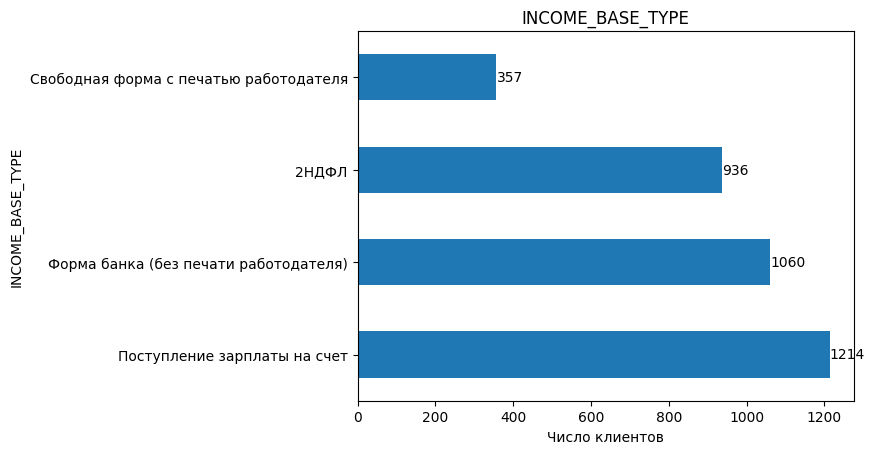

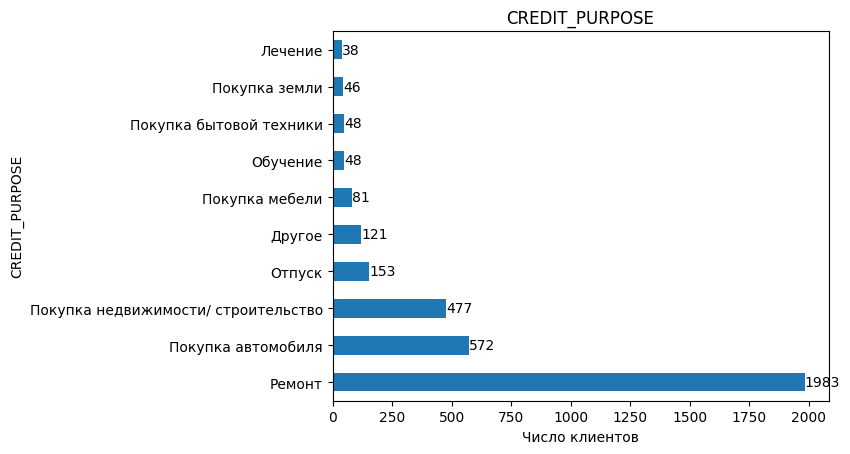

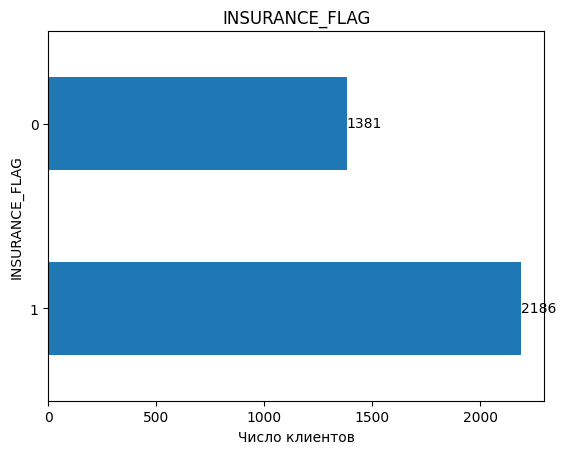

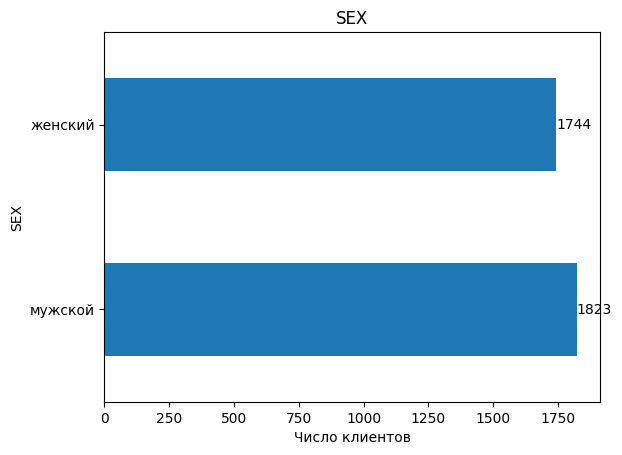

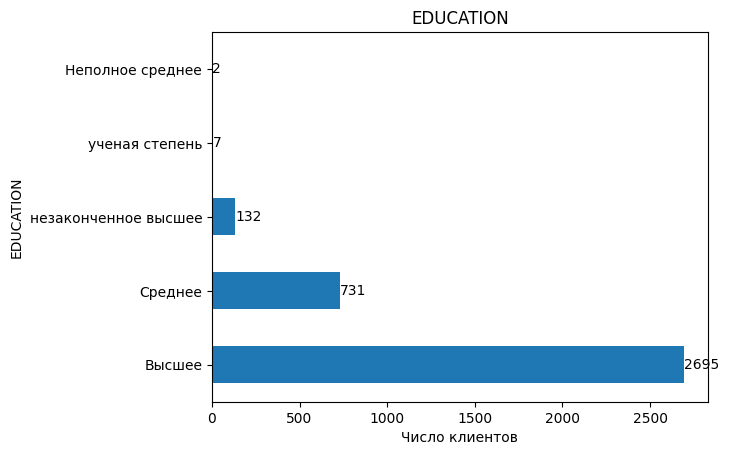

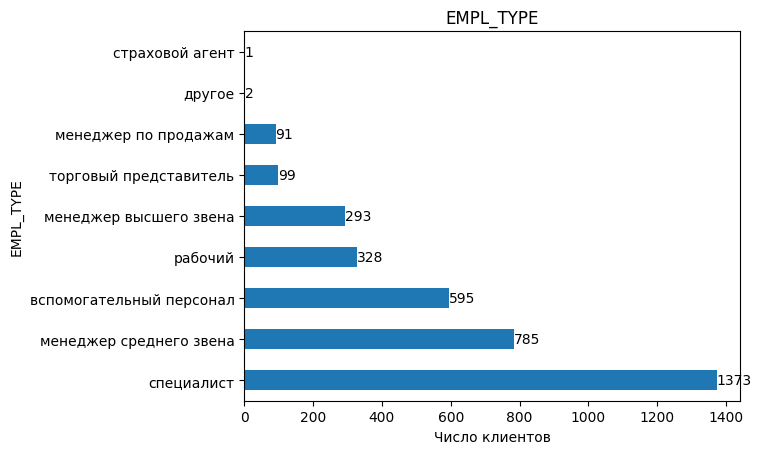

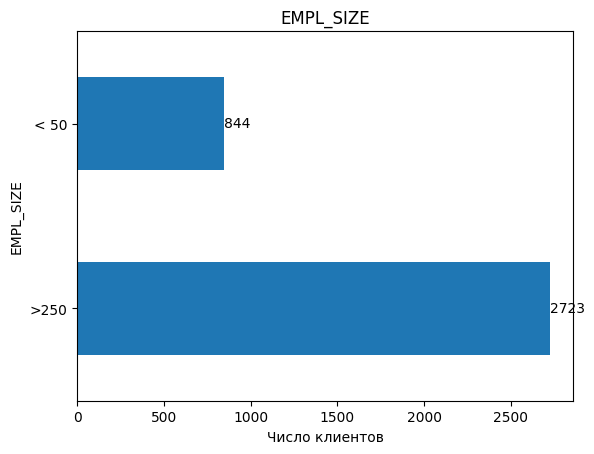

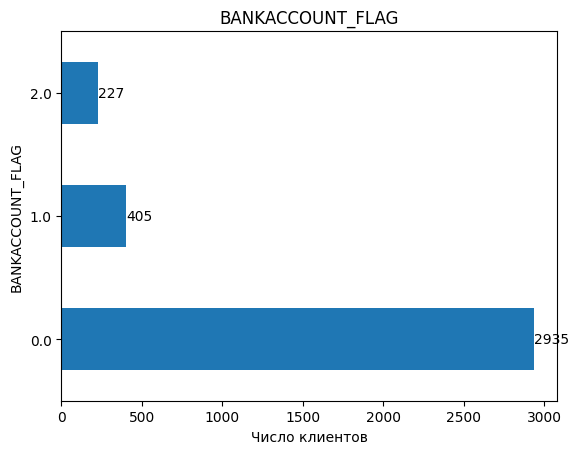

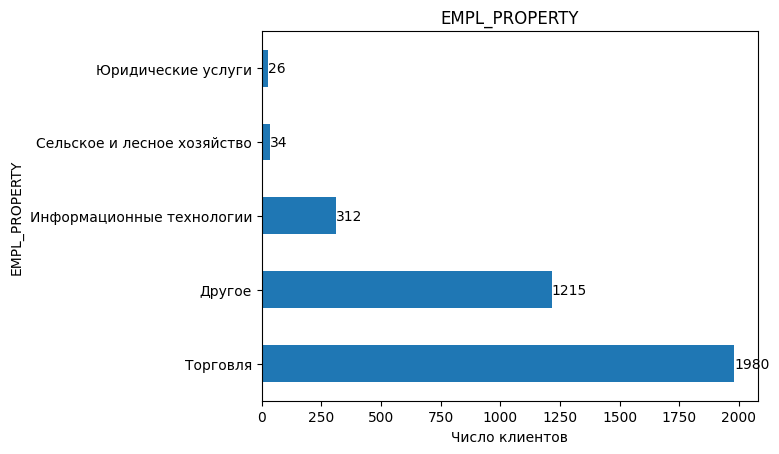

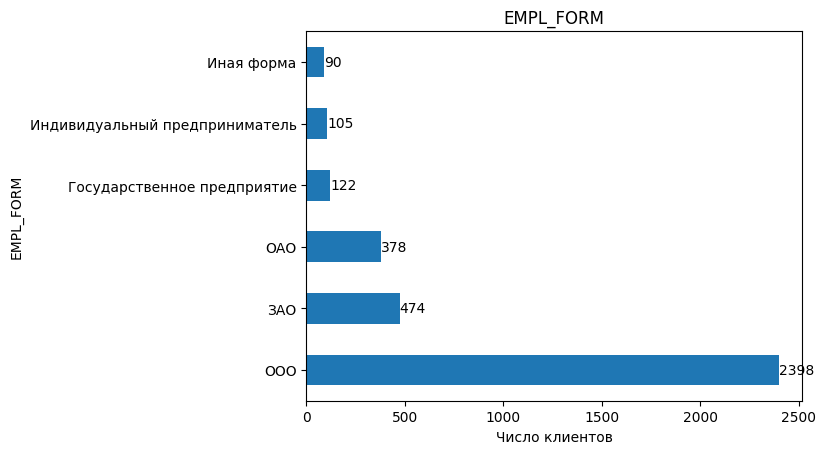

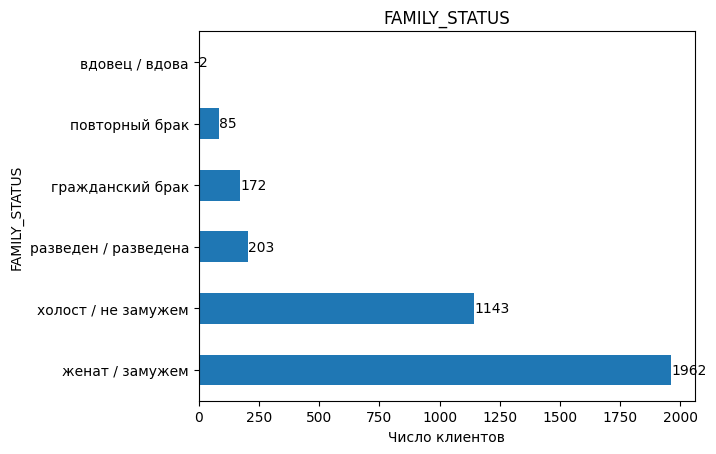

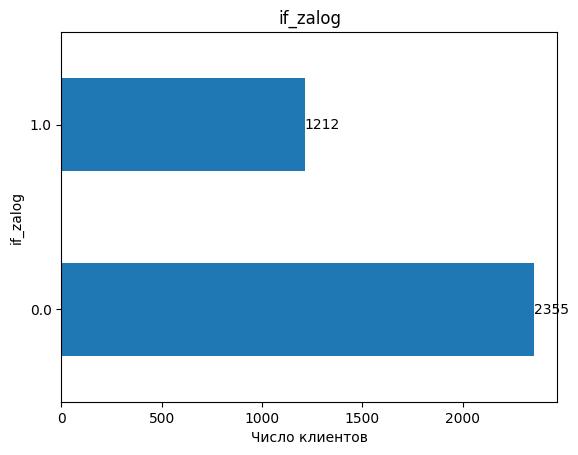

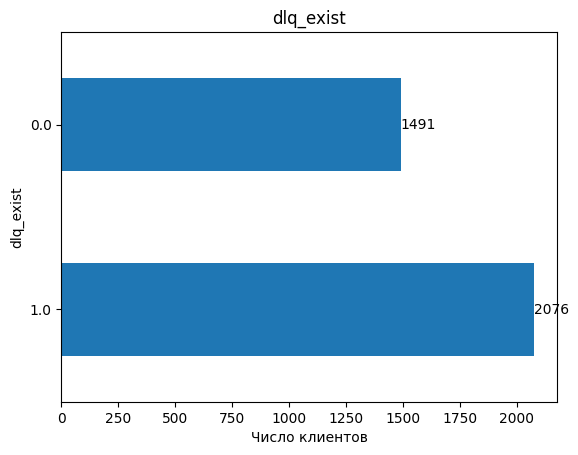

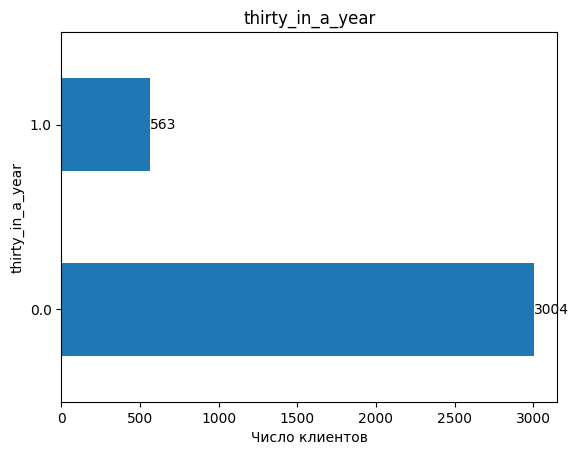

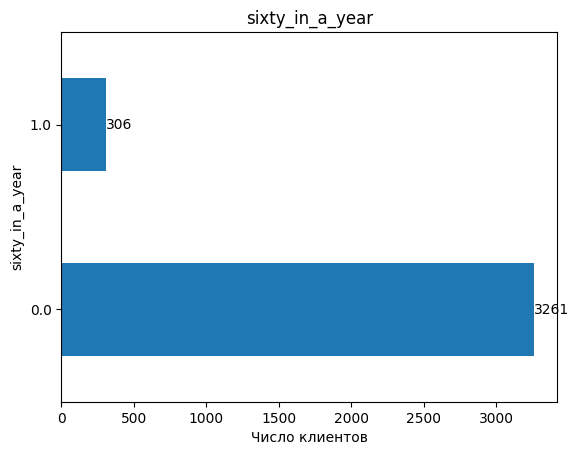

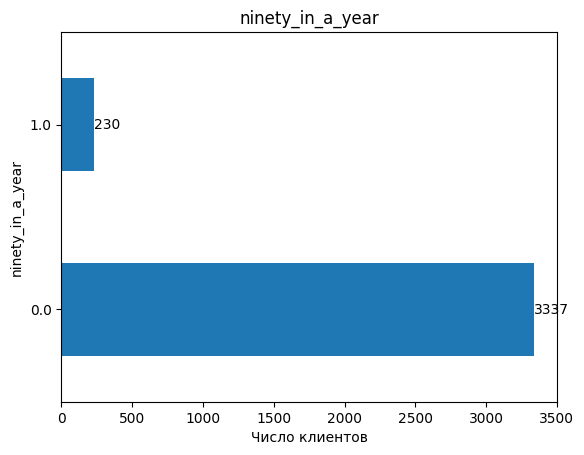

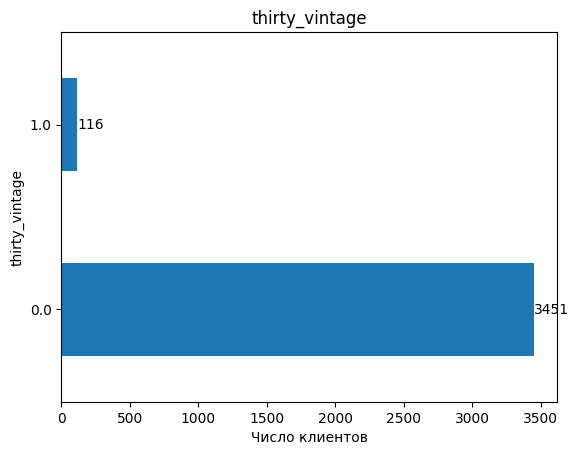

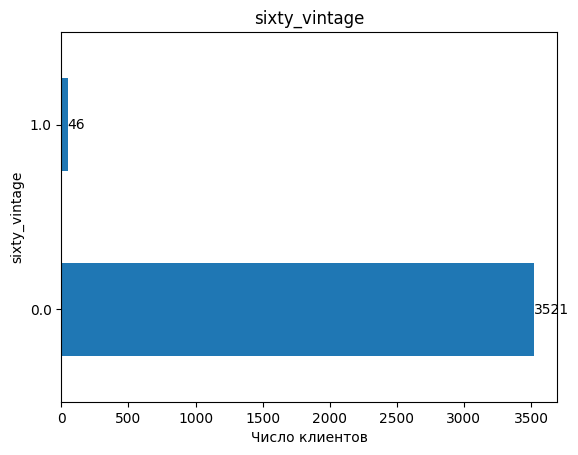

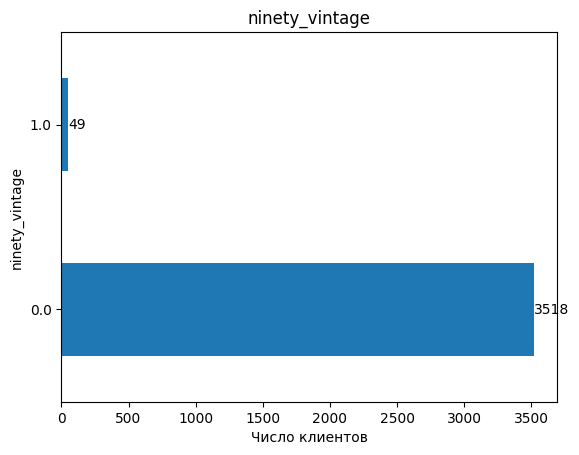

In [27]:
def plot_variable(dfp):
  count = df[dfp].value_counts()

  ax = count.plot(kind='barh')
  plt.title(dfp)
  plt.xlabel('Число клиентов')
  ax.bar_label(ax.containers[0], label_type='edge')
  plt.show()

categorical_variables = categorical_variables[1:]

for i in categorical_variables:
  plot_variable(i)

Данные графики иллюстрируют частоту возникновения признаков категориальных переменных в очищенном датафрейме

**Большинство клиентов во фрейме**:
* находятся в браке,
* оформляют кредиты БЕЗ залога,
* берут кредит на ремонт,
* ранее уже брали кредиты,
* получают высокую зарплату (более 250к в месяц).

In [28]:
#сохранение датафрейма для дальнейшего исследования
df.to_csv('df_v1.csv')

Теперь для кластеризации необходимо категориальные переменные из строкового типа данных привести к целочисленным.

Исходя из графиков выше (на них видны все уникальные значения переменных), для выполнения преобразования потребуется:
1. в столбце SEX женский/мужской заменить на 0/1
2. в столбцах INCOME_BASE_TYPE, CREDIT_PURPOSE, EDUCATION, EMPL_SIZE, EMPL_TYPE, EMPL_PROPERTY, EMPL_FORM, FAMILY_STATUS, EMPL_PROPERTY больше 2х уникальных значений, поэтому для каждого потребуется добавить в фрейм столбец для обозначения наличия/отсутсвия данного уникального признака

In [29]:
# Функция для преобразования фрейма
def categorical_to_int(column_name, frame):
  # Получение значений категориальных переменных как новых столбцов для фрейма
  dummies = pd.get_dummies(frame[column_name], prefix=frame[column_name].name, dtype=int)
  # Объединение полученных элементов с исходным фреймом
  merged = pd.concat([frame, dummies], axis='columns')
  frame = merged.copy().drop(columns=[column_name])
  return frame

In [30]:
# преобразование значений в столбце SEX
df['SEX'] = df['SEX'].replace({'женский': 0})
df['SEX'] = df['SEX'].replace({'мужской': 1})
df['SEX'].astype(int)
df['SEX'].unique()

<ipython-input-30-72b9e114d17a>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['SEX'] = df['SEX'].replace({'мужской': 1})


array([0, 1])

In [31]:
list_for_changes = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'EDUCATION', 'EMPL_SIZE','EMPL_TYPE', 'EMPL_PROPERTY', 'EMPL_FORM', 'FAMILY_STATUS']

for col in list_for_changes:
  df = categorical_to_int(col, df)

df.shape

(3567, 82)

In [32]:
df_statistics(df)

| Column                                                  |   Count Unique |   Count Zeros |   Count NaNs |   % of NaNs | data type   |
|---------------------------------------------------------+----------------+---------------+--------------+-------------+-------------|
| ID                                                      |           3567 |             0 |            0 |           0 | int64       |
| INSURANCE_FLAG                                          |              2 |          1381 |            0 |           0 | int64       |
| DTI                                                     |             57 |             0 |            0 |           0 | float64     |
| SEX                                                     |              2 |          1744 |            0 |           0 | int64       |
| FULL_AGE_CHILD_NUMBER                                   |              5 |          2185 |            0 |           0 | int64       |
| DEPENDANT_NUMBER                              

In [33]:
#сохранение финальной витрины для построение сегментации
df.to_csv('df_norm_v1.csv')

# Часть 2. Сегментация

## Метод 1

Сегментация без учителя. Метод k-средних

In [34]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.decomposition import PCA, TruncatedSVD

In [36]:
# загрузка подготовленной витрины данных
dframe = pd.read_csv('df_norm_v1.csv', delimiter=',', index_col=0)
dframe.drop(columns=['ID'], inplace=True)

X = dframe.copy()
display(X)

,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,BANKACCOUNT_FLAG,Period_at_work,age,max90days,max60days,max30days,max21days,max14days,avg_num_delay,if_zalog,num_AccountActive180,num_AccountActive90,num_AccountActive60,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage,INCOME_BASE_TYPE_2НДФЛ,INCOME_BASE_TYPE_Поступление зарплаты на счет,INCOME_BASE_TYPE_Свободная форма с печатью работодателя,INCOME_BASE_TYPE_Форма банка (без печати работодателя),CREDIT_PURPOSE_Другое,CREDIT_PURPOSE_Лечение,CREDIT_PURPOSE_Обучение,CREDIT_PURPOSE_Отпуск,CREDIT_PURPOSE_Покупка автомобиля,CREDIT_PURPOSE_Покупка бытовой техники,CREDIT_PURPOSE_Покупка земли,CREDIT_PURPOSE_Покупка мебели,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,EDUCATION_Высшее,EDUCATION_Неполное среднее,EDUCATION_Среднее,EDUCATION_незаконченное высшее,EDUCATION_ученая степень,EMPL_SIZE_< 50,EMPL_SIZE_>250,EMPL_TYPE_вспомогательный персонал,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_страховой агент,EMPL_TYPE_торговый представитель,EMPL_PROPERTY_Другое,EMPL_PROPERTY_Информационные технологии,EMPL_PROPERTY_Сельское и лесное хозяйство,EMPL_PROPERTY_Торговля,EMPL_PROPERTY_Юридические услуги,EMPL_FORM_Государственное предприятие,EMPL_FORM_ЗАО,EMPL_FORM_Иная форма,EMPL_FORM_Индивидуальный предприниматель,EMPL_FORM_ОАО,EMPL_FORM_ООО,FAMILY_STATUS_вдовец / вдова,FAMILY_STATUS_гражданский брак,FAMILY_STATUS_женат / замужем,FAMILY_STATUS_повторный брак,FAMILY_STATUS_разведен / разведена,FAMILY_STATUS_холост / не замужем
2,1,0.31,0,0,0,2.0,18.0,24.0,6.0,5.0,5.0,5.0,5.0,0.000000,0.0,1.0,0.0,0.0,1.000000,1.0,0.0,3.0,1.0,1.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
7,0,0.47,1,0,0,0.0,29.0,32.0,3.0,2.0,1.0,1.0,1.0,0.064748,0.0,0.0,0.0,0.0,0.300000,3.0,7.0,130.0,10.0,1.0,1.0,9.0,86.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
11,1,0.49,0,0,0,0.0,29.0,25.0,0.0,0.0,0.0,0.0,0.0,0.137255,0.0,2.0,0.0,0.0,0.428571,3.0,4.0,44.0,7.0,2.0,0.0,3.0,38.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
13,1,0.45,1,0,0,0.0,109.0,34.0,1.0,1.0,0.0,0.0,0.0,0.047619,0.0,0.0,0.0,0.0,0.000000,0.0,2.0,20.0,2.0,0.0,1.0,19.0,101.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
14,1,0.25,1,0,0,0.0,8.0,31.0,7.0,6.0,6.0,5.0,4.0,0.186441,0.0,0.0,0.0,0.0,0.666667,4.0,2.0,48.0,6.0,1.0,0.0,13.0,68.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10231,0,0.27,1,0,0,0.0,19.0,32.0,3.0,2.0,2.0,2.0,0.0,0.010989,1.0,0.0,0.0,0.0,0.250000,1.0,3.0,90.0,4.0,1.0,0.0,25.0,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
10235,0,0.57,1,0,0,0.0,38.0,26.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.0,2.0,1.0,1.0,0.500000,7.0,7.0,132.0,14.0,6.0,1.0,0.0,45.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0
10239,1,0.46,1,1,0,0.0,37.0,41.0,3.0,2.0,1.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.0,0.304348,7.0,16.0,185.0,23.0,3.0,0.0,3.0,80.0,0.0,0.0,0.0,0

Для начала опеределим оптимальное число кластеров при помощи методов Дэвиса-Боулдина и Силуэта.


Метод **Дэвис-Боулдин (DBI)**	сравнивает внутрикластерное расстояние с межкластерным, учитывает плотность и разделенность.	Хорош для балансировки компактности и раздельности.

При этом метод не всегда работает при сильно разных размерах кластеров.

Требуется смотреть на точку минимума на графике.

In [37]:
results_db_kmeans = {}

for i in range(2, 16):

    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)

    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans.update({i: db_index})

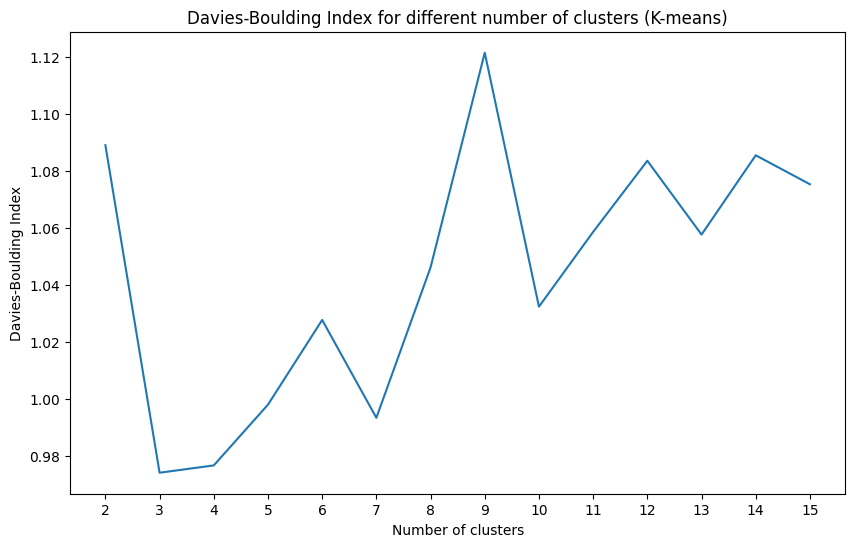

In [38]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()))

plt.xticks(np.arange(2, 16, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (K-means)')
plt.show()

**Силуэт (Silhouette Score)**	оценивает, насколько объекты похожи на свой кластер и отличаются от других, учитывает расстояния между кластерами.
Метод подходит, когда размеры и формы кластеров сильно различаются.

К недостаткам метода относится его нестабильность на сложных данных.

Требуется определить точку максимума на графике.

In [39]:
results_sil_kmeans = {}

for i in range(2, 10):

    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(dframe)

    sil_score = silhouette_score(dframe, labels)
    results_sil_kmeans.update({i: sil_score})

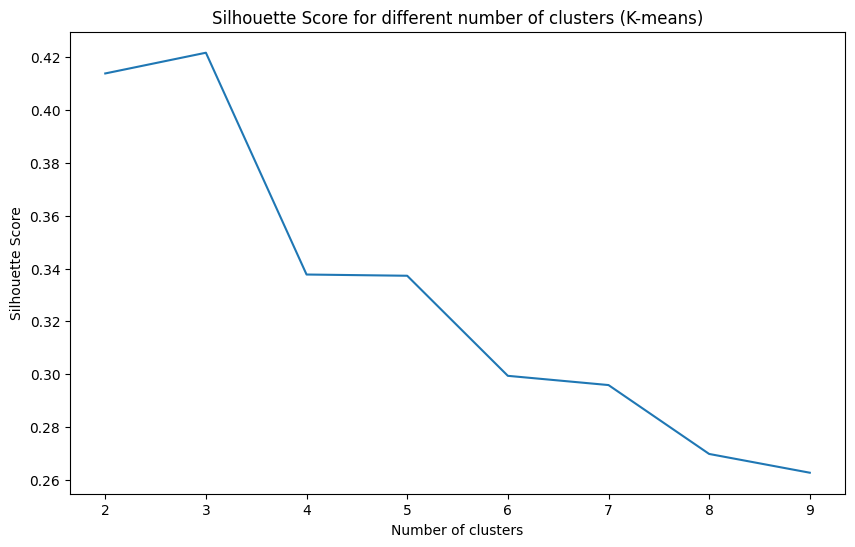

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 10, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (K-means)')
plt.show()

Исходя из полученных графиков, можно сделать вывод, что **оптимальное количество кластеров = 3**

### **K-means для 3х кластеров**

In [41]:
def clasterization_kmean(K, X):
  Y_pca = PCA(n_components=3).fit_transform(X);
  Y_svd = TruncatedSVD(n_components=3).fit_transform(X);

  kmeanModel = KMeans(n_clusters=K).fit(X)

  np.random.seed(21)
  colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
  c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

  plt.figure(figsize=(16,5));
  plt.title('PCA (K-means)')
  plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

  plt.figure(figsize=(16,5)); plt.title('SVD (K-means)')
  plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr);

  # coordinates of cluster center
  centroids = kmeanModel.cluster_centers_

  # cluster label for each data point
  labels = kmeanModel.labels_

  X['Labels'] = kmeanModel.labels_

  for icount in range(0,K):
    d_k = X[(X['Labels'] == icount)]
    print(f'Segment {icount+1}: ', len(d_k))

  print(f'Silhouette Score(n=3): {silhouette_score(X, labels)}')
  print(f'Davies-Boulding Index (n=3): {davies_bouldin_score(X, labels)}')
  print(f'Calinski-Harabasz Index (n=3): {calinski_harabasz_score(X, labels)}')

  return X


**Silhouette Coefficient**
Данный коэффициент показывает насколько в среднем объекты схожи внутри одного кластера и различны с объектами других кластеров. Обычно для выборки силуэт определяется как среднее значение силуэта объектов и лежит в диапазоне [-1, 1], где -1 соответствует неверной кластеризации, 1 указывает на высокую степень соответствия объектов своим кластерам, а 0 говорит о пересекающихся и накладывающихся друг на друга кластерах.

**Davies-Bouldin Index (DBI)**
Показывает среднее сходство между кластерами, которое определяется как мера, сравнивающая межкластерное расстояние с размером самих кластеров
В сравнении с метриками выше, более близкое к нулю значение DBI говорит о лучшем качестве кластеризации. Хотя данная метрика и обладает тем же недостатком, что и коэффициент силуэта, она может быть более предпочтительным вариантом из-за более простого вычисления.

**Calinski-Harabasz Index (CHI)**
Также известный как критерий соотношения дисперсий (VRC), представляет собой отношение сумм межкластерной и внутрикластерной дисперсий.Чем выше значение Калински-Харабаша, тем более чётко модель определяет кластеры. Хотя данная метрика и лучше с вычислительной точки зрения, но, в принципе, имеет такой же недостаток, как и коэффициент силуэта.

Segment 1:  468
Segment 2:  2311
Segment 3:  788
Silhouette Score(n=3): 0.4217381764644771
Davies-Boulding Index (n=3): 0.9740869863550304
Calinski-Harabasz Index (n=3): 2092.713124634179


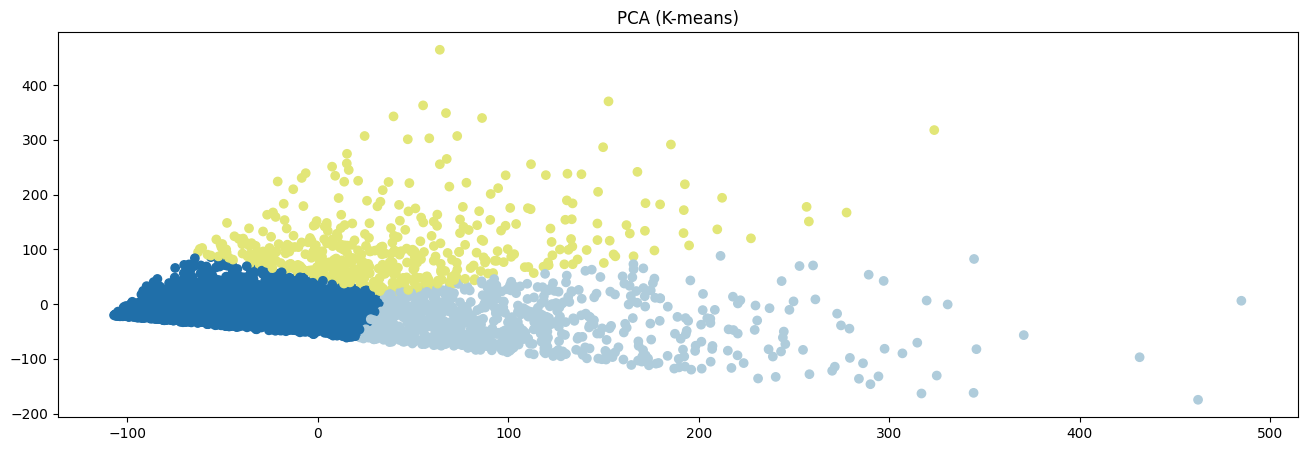

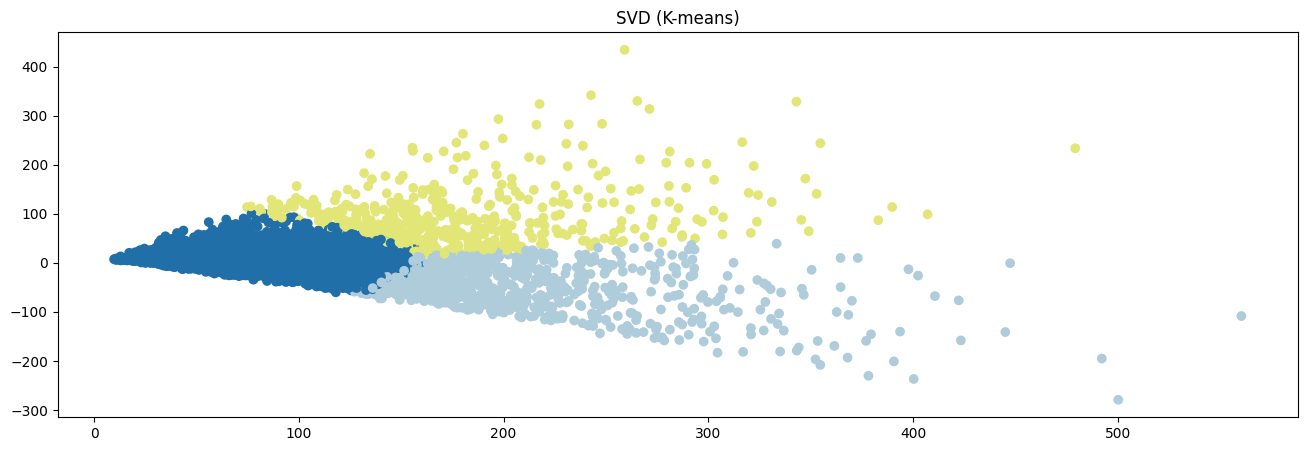

In [42]:
new_df = clasterization_kmean(3, dframe)

In [43]:
# Делим данные на кластеры для определения портрета клиента
cluster_1 = new_df.loc[new_df['Labels'] == 0]
cluster_2 = new_df.loc[new_df['Labels'] == 1]
cluster_3 = new_df.loc[new_df['Labels'] == 2]

Далее посмотрим на распределение данных внутри каждого из кластеров:
*   для количественных переменных смотрим на средние значения
*   для категориальных переменных смотрим на медианные/наиболее часто встречающиеся
По полученным значениям определим портрет клиента в каждом сегменте.

In [44]:
def cluster_info(df):
  qv = ['DTI','FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER', 'Period_at_work', 'age',
       'max90days', 'max60days', 'max30days', 'max21days', 'max14days',
       'avg_num_delay', 'num_AccountActive180',
       'num_AccountActive90', 'num_AccountActive60', 'Active_to_All_prc',
       'numAccountActiveAll', 'numAccountClosed', 'sum_of_paym_months',
       'all_credits', 'Active_not_cc', 'own_closed', 'min_MnthAfterLoan',
       'max_MnthAfterLoan']

  df1 = df[qv].copy()

  data = []
  for column in df1:
      data.append([df1[column].mean()] + [table_description.loc[table_description['Атрибуты'] == column,'Описание'].iloc[0]] + [column])

  print("АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ КЛАСТЕРА:")
  print(tabulate(data, headers=['mean', 'Description', 'Column'], tablefmt='orgtbl'))

  df2 = df.drop(columns = qv)

  data = []
  for column in df2:
      data.append([df2[column].median()]+ [] + [column])

  print("\nАНАЛИЗ КАЧЕСТВЕННЫХ ПЕРЕМЕННЫХ КЛАСТЕРА:")
  print(tabulate(data, headers=['median', 'Column'], tablefmt='orgtbl'))

In [45]:
cluster_info(cluster_1)

АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ КЛАСТЕРА:
|        mean | Description                                                                                                                    | Column                |
|-------------+--------------------------------------------------------------------------------------------------------------------------------+-----------------------|
|   0.390043  | debt-to-income ratio — отношение долга к доходам                                                                               | DTI                   |
|   0.58547   | Кол-во лет ребенку                                                                                                             | FULL_AGE_CHILD_NUMBER |
|   0         | Кол-во иждивенцев                                                                                                              | DEPENDANT_NUMBER      |
| 167.618     | Время работы (кол-во дней)                                                                      

In [46]:
cluster_info(cluster_2)

АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ КЛАСТЕРА:
|        mean | Description                                                                                                                    | Column                |
|-------------+--------------------------------------------------------------------------------------------------------------------------------+-----------------------|
|  0.380688   | debt-to-income ratio — отношение долга к доходам                                                                               | DTI                   |
|  0.4881     | Кол-во лет ребенку                                                                                                             | FULL_AGE_CHILD_NUMBER |
|  0.00778884 | Кол-во иждивенцев                                                                                                              | DEPENDANT_NUMBER      |
| 35.7032     | Время работы (кол-во дней)                                                                      

In [47]:
cluster_info(cluster_3)

АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ КЛАСТЕРА:
|         mean | Description                                                                                                                    | Column                |
|--------------+--------------------------------------------------------------------------------------------------------------------------------+-----------------------|
|   0.422018   | debt-to-income ratio — отношение долга к доходам                                                                               | DTI                   |
|   0.619289   | Кол-во лет ребенку                                                                                                             | FULL_AGE_CHILD_NUMBER |
|   0.00888325 | Кол-во иждивенцев                                                                                                              | DEPENDANT_NUMBER      |
|  57.0673     | Время работы (кол-во дней)                                                                

**Кластер 1.**

* Мужчина около 42 лет  
* Семейное положение: женат  
* Скорее всего БЕЗ детей, и однозначно БЕЗ иждивенцев.  
* Имеет высшее образование  
* Оформил кредит БЕЗ залога.  
* Есть страхование заемщика при получении кредита  
* Доход >250 тыс.  
* Работает более 5 месяцев на новом месте (около 168 дней)  
* Работает в сфере торговли.  
* Цель взятия кредита – ремонт  
* Отношение долга к доходам (DTI) довольно низкое (0.39).  
* Имеет около 6 кредитов, из которых в среднем имеет до 2 активных счетов и около 4 закрытых.  
* Сумма платежей за последний месяц составляет около 83 тыс. руб.  
* Последний кредит был взят в среднем 17 месяцев назад, а первый — около  74 месяцев назад.  

*В целом, это платежеспособный клиент с хорошей кредитной историей, имеет стабильный доход.*

**Кластер 2.**

* Мужчина 34 лет, женат, имеет высшее образование.  
* Работает в сфере торговли, трудоустроен в ООО, стаж на текущем месте — около 36 дней.  
* Доход более 250 тыс.  
* Скорее всего есть ребенок, но БЕЗ иждивенцев.  
* Цель кредитования — ремонт.  
* Оформил кредит без залога, но со страховкой.  
* Банковского счета не имеет.  
* Отношение долга к доходам (DTI) — 0.38, что немного ниже, чем у клиентов из кластера 1.  
* Имеет около 4 кредита, из которых в среднем около 1.8 активных и 2.5 закрытых.  
* Сумма платежей за последний месяц — около 48 тыс. руб.  
* Первый кредит был взят около 51 месяцев назад, последний — около 14 месяцев назад.  
* Присутствуют просрочки, но без серьезных долговых проблем.

*Клиент менее кредитно-активен, чем в кластере 1, с умеренной финансовой нагрузкой, но без критических просрочек. Имеет стабильный доход и работу, но активно использует кредиты.*

**Кластер 3.**

* Мужчина 38 лет  
* Семейное положение: женат  
* Возможно имеет детей, и однозначно БЕЗ иждивенцев.  
*Имеет высшее образование  
*Доход >250 тыс.  
*Стаж на текущем месте работы — 57 дней (около 2 месяцев)  
*Оформляет кредит С ЗАЛОГОМ, и со страховкой.  
*Цель взятия кредита — ремонт  
*Отношение долга к доходу (DTI) — 0.42, что умеренно.  
*Имеет около 11 кредитов, из которых в среднем имеет около 4 активных счетов и около 7 закрытых.  
*Сумма платежей за последний месяц составляет около 184 тыс. руб.  
*Последний кредит был взят около 10 месяцев назад, а первый — около 87 месяцев назад.  
*Имеет просрочки, но незначительные (среднее количество задержек — 0.055).  

*В целом, клиент имеет стабильную работу, умеренно кредитно-активен, с относительно невысокой долговой нагрузкой и аккуратной финансовой дисциплиной (есть небольшие просрочки).*

**Анализ полученных кластеров**

1. **Кластер 1** – мужчины около 42 лет, с стабильным доходом и умеренно кредитной активностью. Оформляют кредиты без залога, но со страховкой, берут кредиты на ремонт. Работают длительное время на текущем месте (около 168 дней), имеют в среднем 6 кредитов (из них около 2 активных и 4 закрытых) и низкий уровень долговой нагрузки (DTI ≈ 0.39).

2. **Кластер 2** – молодые мужчины около 34 лет, с коротким стажем работы (около 36 дней). Они оформляют кредит без залога, но со страховкой, также берут кредиты на ремонт. Имеют умеренно низкий DTI (≈ 0.38), меньшее количество кредитов (около 4, из которых примерно 1.8 активных и 2.5 закрытых) и активнее запрашивают кредитную историю.

3. **Кластер 3** – мужчины около 38 лет, с более высокой кредитной активностью. Они оформляют кредит с залогом и со страховкой, также для ремонта, при этом имеют самый высокий DTI (≈ 0.42). В кластере отмечается значительное число кредитов (около 11, из которых примерно 4 активных и 7 закрытых) и самая высокая сумма платежей за последний месяц (около 184 тыс. руб.), несмотря на короткий стаж работы (около 57 дней).

---

**Выводы по итогам сегментации методом K-means**

* ✔️ В кластерах явно выделяются разные демографические группы по возрасту и кредитной активности.  
* ✔️ Наблюдаются различия по стажу работы, количеству кредитов и сумме платежей, что отражает разнообразие финансового поведения.  
* ✔️ Различия по DTI между кластерами также прослеживаются, особенно в кластере 3, где значение DTI самое высокое.  
* ⚠️ Во всех кластерах кредиты берутся на ремонт, а наличие страховки практически универсально, что может снижать ценность сегментации с точки зрения маркетинга.  
* ⚠️ Короткий стаж работы в кластерах 2 и 3 может указывать на потенциальную нестабильность, что требует дополнительного внимания при оценке кредитоспособности.

## Метод 2

**Сегментация с учителем. Дерево решений**

**Плюсы:**

✅ Позволяет находить сложные зависимости.

✅ Порождение четких правил классификации, понятных человеку. Это свойство называют интерпретируемостью модели;

✅ Деревья решений могут легко визуализироваться, то есть может "интерпретироваться" (строгого определения я не видел) как сама модель (дерево), так и прогноз для отдельного взятого тестового объекта (путь в дереве);

✅ Быстрые процессы обучения и прогнозирования;

✅ Малое число параметров модели;

✅ Поддержка и числовых, и категориальных признаков.

**Минусы:**

❌ требует качественной разметки данных.

❌ деревья очень чувствительны к шумам во входных данных;

❌ Разделяющая граница, построенная деревом решений, имеет свои ограничения, и на практике дерево решений по качеству классификации уступает некоторым другим методам;

❌ Необходимость отсекать ветви дерева (pruning) или устанавливать минимальное число элементов в листьях дерева или максимальную глубину дерева для борьбы с переобучением;

❌ Модель умеет только интерполировать, но не экстраполировать. То есть дерево решений делает константный прогноз для объектов, находящихся в признаковом пространстве вне параллелепипеда, охватывающего все объекты обучающей выборки.


In [48]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn import tree as tr
from sklearn.metrics import accuracy_score, classification_report

In [49]:
# загрузка подготовленной витрины данных
df_copy = pd.read_csv('df_norm_v1.csv', delimiter=',', index_col=0)
df_copy.drop(columns=['ID'], inplace=True)


Accuracy: 0.6639
              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59       299
         1.0       0.71      0.72      0.71       415

    accuracy                           0.66       714
   macro avg       0.65      0.65      0.65       714
weighted avg       0.66      0.66      0.66       714



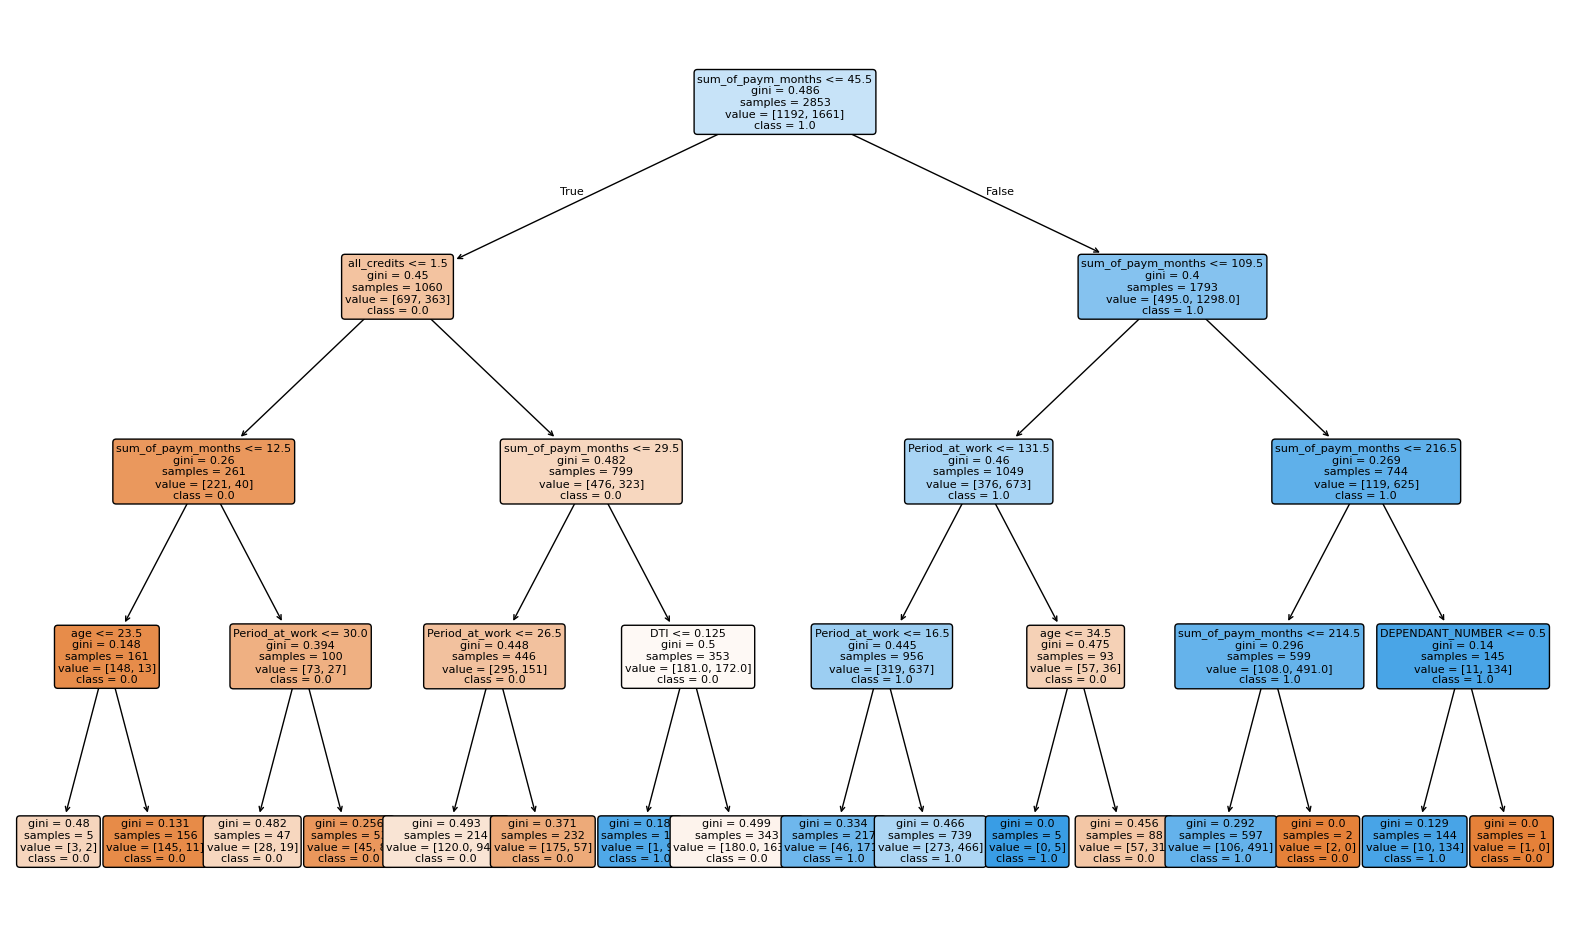

cluster
1.0        2137
0.0        1430
Name: count, dtype: int64


In [50]:
# Определяем целевую переменную (INCOME_BASE_TYPE)
y = df_copy['dlq_exist']

# Выбираем основные признаки и контрольные переменные
selected_features = [
    'DTI', 'SEX', 'age', 'FULL_AGE_CHILD_NUMBER', 'DEPENDANT_NUMBER','Period_at_work', 'sum_of_paym_months', 'numAccountActiveAll', 'all_credits',
    'CREDIT_PURPOSE_Другое', 'CREDIT_PURPOSE_Лечение','CREDIT_PURPOSE_Обучение',
    'CREDIT_PURPOSE_Отпуск', 'CREDIT_PURPOSE_Покупка автомобиля', 'CREDIT_PURPOSE_Покупка бытовой техники',
    'CREDIT_PURPOSE_Покупка земли', 'CREDIT_PURPOSE_Покупка мебели',
    'CREDIT_PURPOSE_Покупка недвижимости/ строительство', 'CREDIT_PURPOSE_Ремонт', 'EDUCATION_Высшее',
    'EDUCATION_Неполное среднее', 'EDUCATION_Среднее', 'EDUCATION_незаконченное высшее', 'EDUCATION_ученая степень',
    'EMPL_SIZE_< 50', 'EMPL_SIZE_>250','EMPL_TYPE_вспомогательный персонал', 'EMPL_TYPE_другое',
       'EMPL_TYPE_менеджер высшего звена', 'EMPL_TYPE_менеджер по продажам',
       'EMPL_TYPE_менеджер среднего звена', 'EMPL_TYPE_рабочий',
       'EMPL_TYPE_специалист', 'EMPL_TYPE_торговый представитель',
       'EMPL_PROPERTY_Другое', 'EMPL_PROPERTY_Информационные технологии',
       'EMPL_PROPERTY_Сельское и лесное хозяйство', 'EMPL_PROPERTY_Торговля',
       'EMPL_PROPERTY_Юридические услуги','FAMILY_STATUS_вдовец / вдова',
       'FAMILY_STATUS_гражданский брак', 'FAMILY_STATUS_женат / замужем',
       'FAMILY_STATUS_повторный брак', 'FAMILY_STATUS_разведен / разведена',
       'FAMILY_STATUS_холост / не замужем']

X = df_copy[selected_features]

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели дерева решений (глубина ограничена 4)
clf = tr.DecisionTreeClassifier(max_depth=4, random_state=40)
clf.fit(X_train, y_train)

# Предсказание и оценка модели
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

# Визуализация дерева решений
plt.figure(figsize=(20, 12))
tr.plot_tree(clf, feature_names=selected_features, class_names=[str(cls) for cls in clf.classes_], filled=True, rounded=True, fontsize=8)
plt.show()

# Добавление сегментации клиентов по прогнозу модели
df_copy['cluster'] = clf.predict(X)
print(df_copy[['cluster']].value_counts())


In [51]:
# Вычисление метрик
silhouette = silhouette_score(df_copy, df_copy["cluster"])
davies_bouldin = davies_bouldin_score(df_copy, df_copy["cluster"])
calinski_harabasz = calinski_harabasz_score(df_copy, df_copy["cluster"])

# Вывод результатов
print(f"Silhouette Score: {silhouette:.3f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz:.3f}")

Silhouette Score: 0.232
Davies-Bouldin Index: 1.446
Calinski-Harabasz Index: 1097.052


In [52]:
# Анализ характеристик сегментов
tree_cluster_1 = df_copy.loc[df_copy['cluster'] == 0]
cluster_info(tree_cluster_1)

АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ КЛАСТЕРА:
|        mean | Description                                                                                                                    | Column                |
|-------------+--------------------------------------------------------------------------------------------------------------------------------+-----------------------|
|  0.371224   | debt-to-income ratio — отношение долга к доходам                                                                               | DTI                   |
|  0.455245   | Кол-во лет ребенку                                                                                                             | FULL_AGE_CHILD_NUMBER |
|  0.00559441 | Кол-во иждивенцев                                                                                                              | DEPENDANT_NUMBER      |
| 58.5427     | Время работы (кол-во дней)                                                                      

In [53]:
tree_cluster_2 = df_copy.loc[df_copy['cluster'] == 1]
cluster_info(tree_cluster_2)

АНАЛИЗ КОЛИЧЕСТВЕННЫХ ПЕРЕМЕННЫХ КЛАСТЕРА:
|         mean | Description                                                                                                                    | Column                |
|--------------+--------------------------------------------------------------------------------------------------------------------------------+-----------------------|
|   0.40431    | debt-to-income ratio — отношение долга к доходам                                                                               | DTI                   |
|   0.579785   | Кол-во лет ребенку                                                                                                             | FULL_AGE_CHILD_NUMBER |
|   0.00795508 | Кол-во иждивенцев                                                                                                              | DEPENDANT_NUMBER      |
|  57.1867     | Время работы (кол-во дней)                                                                

**Кластер 1.**

* Женщина 35 лет.  
* Семейное положение: замужем.  
* Скорее всего нет детей, БЕЗ иждивенцев.  
* Имеет высшее образование.  
* Работает в сфере торговли, доход >250 тыс.  
* DTI (отношение долга к доходу) – 0,37, что указывает на относительно умеренную долговую нагрузку.  
* На текущем месте работы работает почти 2 месяца (≈59 дней).  
* Имеет около 3 кредитов, из которых доля активных счетов к общему количеству довольно высокая (активных счетов ≈1,36, закрытых ≈1,60, Active_to_All_prc ≈0,49).  
* Просрочек по выплатам практически нет (среднее количество задержек ≈0,06).  
* Сумма платежей за последний месяц – около 27,6 тыс. руб.  
* Минимальное количество месяцев с момента последнего кредита – 16,4 месяцев, что говорит о недавнем оформлении кредита.  
* Первый кредит был оформлен в среднем 43,2 месяца назад.  
* Основная цель кредита – ремонт.

*Платежеспособная заемщица с высшим образованием, работающая в сфере торговли. Недавно сменила работу, но с стабильным уровнем дохода. Финансово дисциплинированна, без просрочек, использует кредиты с умеренной частотой.*

**Кластер 2.**

* Мужчина 36 лет.  
* Семейное положение: женат.  
* Скорее всего, есть дети (средний возраст ребенка ≈0,58 года), но без иждивенцев.  
* Имеет высшее образование.  
* Работает в сфере торговли, доход >250 тыс.  
* DTI (отношение долга к доходу) – 0,40, что говорит о несколько повышенной долговой нагрузке по сравнению с 1 кластером.  
* На текущем месте работы – около 57 дней.  
* Имеет примерно 7,7 кредита, из которых около 2,8 активных счетов и 4,9 закрытых. Доля активных счетов к общему количеству – 0,39.  
* В кредитной истории есть просрочки.  
* Сумма платежей за последний месяц – около 119,4 тыс. руб.  
* Минимальное количество месяцев с момента последнего кредита – около 12 месяцев, что говорит о недавнем оформлении новых кредитов.  
* Первый кредит был оформлен в среднем ≈74 месяца назад.  
* Основная цель кредита – ремонт.

*Клиент из Кластера 2 – финансово активный заемщик с продолжительной кредитной историей, но с повышенной долговой нагрузкой и наличием просрочек.*


Кластеризация методом решающего дерева привела к выделению двух групп заемщиков, отличающихся по ряду финансовых и поведенческих характеристик. Однако корректность и эффективность кластеризации можно оценить с разных точек зрения.

**Выводы по кластеризации методом решающего дерева:**
* ✔️ Кластеры четко различаются уровнем финансовой активности – наблюдаются значительные различия по количеству кредитов, сумме платежей и активности счетов.
* ✔️ Два кластера отличаются гендерным признаком.
* ⚠️ Недостаточно выражены возрастные различия клиентов между кластерами.
* ⚠️ Различия по DTI между кластерами незначительные (0.371 у одного и 0.404 у другого), что затрудняет дифференциацию по долговой нагрузке.
* ⚠️ Основная цель кредита – ремонт, а заемщики везде застрахованы, что снижает ценность сегментации с точки зрения маркетинга.


## Выводы по 2 части

* Метод решающего дерева выделяет всего 2 кластера, при этом для метода K-means оптимальным оказалось решение взять 3 кластера.
* Метод решающего дерева имеет достаточно слабые метрики, особенно по Silhouette Score (≈0.2 против ≈0.4 в кластеризации) и Davies-Bouldin Index, что указывает на недостаточную четкость кластеризации и возможное перекрытие между группами. Этот метод может быть полезен для базового анализа, но он не даёт четких, легко интерпретируемых групп заемщиков.
* Метод K-means показывает существенно лучшие результаты по всем метрикам. Высокий Silhouette Score, низкий Davies-Bouldin Index и высокий Calinski-Harabasz Index свидетельствуют о том, что методом K-means получилось более эффективно разделить заемщиков на осмысленные группы.
* **K-means является более эффективным методом для данной задачи, так как он показывает лучшее разделение данных и позволяет выделить более детализированные группы заемщиков.**

Были выбраны метод k-means, так как он позволяет без предварительных меток выявить естественные кластеры в данных, разделив заемщиков на группы с похожими характеристиками. Решающее дерево дополнительно дает возможность интерпретировать полученные сегменты в виде понятных правил, что важно для объяснения различий между группами. Другие методы с учителем требовали бы четко определённой целевой переменной, а альтернативные без учителя могли бы быть менее интерпретируемыми (Также эти методы в целом популярны на практике, т.к. они достаточно robust'ны (надежны и широко применимы), и просты в реализации и тьюнинге, а также легко интерпретируемы, более сложные (в реализации) но, возможно более эффеткивные методы не смогут дать столько ясности).